# Project 1: SAT & ACT Analysis

## Problem Statement
------

In this project, the main focus is to analyse a dataset comprising of participation rates and mean test scores by states for SAT and ACT in the year 2017 and 2018, with the aim to **identify ways to improve SAT participation rate for the College Board**.

## Executive Summary
------

From the data analysis and additinal secondary research, **state contracts and state funded test are key drivers to SAT participation**. 

Among states that showed strong increase in SAT participate in 2018, such as Illinois, Colorado, and Rhode Island, the uptake in SAT participation rate is linked to College Board winning state contracts, in which high school students are offered state-funded SAT test.

It is recommended that the College Board focuses on developing partnership with states that do not have any prevailing contract awarded to either the College Board or ACT, and currently have low SAT participation in 2018. Examples of such states include Iowa, Kansas, and South Dakota. Priority can be placed on Iowa, which has a higher population.

In the longer term, the College Board can also explore states that already mandate state-wide ACT participation and lobby the education boards to switch to the SAT when the current state contract is expiring. These states are more likely to have the required infrastructure and resources to support state-wide test arrangement. Examples of such states include Montana, Utah and Wyoming.

------

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning
------

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
# displaying the tail of the SAT and ACT 2017 dataframes
sat_2017.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [6]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

The dataframe sat_2017 shows the following for each state in SAT 2017:
* the participation rate
* the average score by subject (Evidence-based Reading and Writing, Math), and
* the average total score 

The dataframe act_2017 shows the following for each state in ACT 2017:
* the participation rate
* the average score by subject (English, Math, Reading, Science), and
* the average composite score

#### 4a. Does the data look complete? 

In [7]:
# checking the number of rows and columns in each dataframe
sat_2017.shape

(51, 5)

In [8]:
act_2017.shape

(52, 7)

In [9]:
# checking for null values in each dataframe
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


**Answer:**

The dataframe for SAT 2017 has 51 rows, while that for **ACT 2017 has one more row** (52 rows). 

It is also noted that the act_2017 dataset started a 'State' labelled as **National**, which reflects the national aggregate scores instead of the score for a state, which should be removed.

There is **no null value** in both the dataframe. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [11]:
# generate descriptive statistics for SAT 2017
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [12]:
# filtering for the state with minimum Math score which is exceptionally low
sat_2017[sat_2017['Math'] == sat_2017['Math'].min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [13]:
# generate descriptive statistics for ACT 2017
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [14]:
# filtering for the state with minimum Science score with is exceptionally low
act_2017[act_2017['Science'] == act_2017['Science'].min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


**Answer:**

SAT is scored on a scale of 400 to 1600 (200 to 800 per section), while ACT is scored on a scale of 1 to 36.
(source: https://www.princetonreview.com/college/sat-act)

Based on this information, the following possible data errors are observed from the 2017 datasets:

**1. SAT 2017: Maryland's Math Score**

In the sat_2017 dataset, the minimum value for Math seems to be very low at 52 (vs. mean of 547.63). Filtering the data shows that this score belongs to Maryland. Cross checking against the source shows that the correct value should be 524.
(source data retrieved from: https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)

**2. ACT 2017: Maryland's Science Score**

In the act_2017 dataset, the minimum value for Math seems to be very low at 2.3 (vs. mean of 21.04). Filtering the data shows that this score again belongs to Maryland. Cross checking against the source shows that the correct value should be 23.2.
(source data retrieved from: https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf) 


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [15]:
# fix the error in SAT 2017 Maryland's Math score
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math'] = 524

In [16]:
# to check that the value is updated
sat_2017.loc[sat_2017['State'] == 'Maryland'] 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [17]:
# fix the error in ACT 2017 Maryland's Science score
act_2017.loc[act_2017['State'] == 'Maryland', 'Science'] = 23.2

In [18]:
# to check that the value is updated
act_2017.loc[act_2017['State'] == 'Maryland']  

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [19]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [20]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

In both the SAT 2017 and ACT 2017 dataframes, the Participation column has the data type of object.

In the ACT 2017 dataset, the data type for the 'Composite' score is currently an object (instead of float). 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [21]:
# define function to strip away '%' from 'Participation' column and convert to numeric type

def change_participation_to_numeric(df):
    """Function to rmove '%' from participation rate column and change to numeric data type"""
    df['Participation'] = df['Participation'].str.strip('%')
    df['Participation'] = df['Participation'].apply(pd.to_numeric)

In [22]:
# call the function on sat_2017
change_participation_to_numeric(sat_2017)

In [23]:
# check data type for sat_2017 dataframe
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [24]:
# call the function on act_2017
change_participation_to_numeric(act_2017)

In [25]:
# check data type for act_1027 dataframe
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ KB


In [26]:
# act_2017['Composite'] = act_2017['Composite'].apply(pd.to_numeric)

Applying the above code (which is commented off) will return a *ValueError: Unable to parse string "20.2x" at position 0.*

In [27]:
# check for the row in ACT 2017 dataframe with 'Composite' score of '20.2x' as shown in above error
act_2017[act_2017['Composite'] == '20.2x'] 

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


Checking against the source show that the correct value should be 20.2.

- Fix any individual values preventing other columns from being the appropriate type.

In [28]:
act_2017.loc[act_2017['State'] == 'Wyoming', 'Composite'] = 20.2

In [29]:
# check that the value is updated
act_2017.loc[act_2017['State'] == 'Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [30]:
act_2017['Composite'] = act_2017['Composite'].apply(pd.to_numeric)

- Display the data types again to confirm they are correct.

In [31]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [32]:
# define a function to rename column names as per guidelines above

def rename_col (df, test):
    """function to rename column names"""
    new_col_labels = []
    for col in df.columns:
        col = str(col).lower().replace(' ', '_').replace('-', '_')
        if col == 'evidence_based_reading_and_writing':
            col = 'reading_' + str(test) 
        elif col != 'state':
            col = str(col) + '_' + str(test)
        new_col_labels.append(col)
    df.columns = new_col_labels

In [33]:
rename_col(sat_2017, 'sat')

In [34]:
# check that column names are updated in the SAT 2017 dataframe
sat_2017.head()

,state,participation_sat,reading_sat,math_sat,total_sat
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [35]:
rename_col(act_2017, 'act')

In [36]:
# check that column names are updated in the ACT 2017 dataframe
act_2017.head()

,state,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


**Data Dictionary:**

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|state|object|ACT/SAT|Name of state from which data is collected| 
|participation_sat_2017|int|SAT|Percentage of graduating high school students participated in SAT in 2017|
|reading_sat_2017|int|SAT| Average score of Evidence-based reading and writing section for SAT in 2017|
|math_sat_2017|int|SAT|Average score of Math section for SAT in 2017|
|total_sat_2017|int|SAT|Average total SAT score for SAT in 2017|
|participation_act_2017|int|ACT|Percentage of graduating high school students participated in ACT in 2017|
|english_act_2017|float|ACT|Average score of English section for ACT in 2017|
|math_act_2017|float|ACT|Average score of Math section for ACT in 2017|
|reading_act_2017|float|ACT|Average score of Reading section for ACT in 2017|
|science_act_2017|float|ACT|Average score of Science section for ACT in 2017|
|composite_act_2017|float|ACT|Average Composite score for ACT in 2017|
|participation_sat_2018|int|SAT|Percentage of graduating high school students participated in SAT in 2018|
|reading_sat_2018|int|SAT| Average score of Evidence-based reading and writing section for SAT in 2018|
|math_sat_2018|int|SAT|Average score of Math section for SAT in 2018|
|total_sat_2018|int|SAT|Average total SAT score for SAT in 2018|
|participation_act_2018|int|ACT|Percentage of graduating high school students participated in ACT in 2018|
|english_act_2018|float|ACT|Average score of English section for ACT in 2018|
|math_act_2018|float|ACT|Average score of Math section for ACT in 2018|
|reading_act_2018|float|ACT|Average score of Reading section for ACT in 2018|
|science_act_2018|float|ACT|Average score of Science section for ACT in 2018|
|composite_act_2018|float|ACT|Average Composite score for ACT in 2018|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

As identified in part 4a, there is an extra row in the ACT 2017 dataframe, which contain the national aggregate scores.

In [37]:
# remove the row of national aggregates from ACT 2017 dataframe
act_2017.drop(act_2017[act_2017['state'] == 'National'].index, inplace = True)

In [38]:
# check that the extra row is removed
act_2017.head()

,state,participation_act,english_act,math_act,reading_act,science_act,composite_act
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


In [39]:
act_2017.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [40]:
combined_2017 = pd.merge(sat_2017, act_2017, on='state', how='left')
combined_2017.head()

,state,participation_sat,reading_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [41]:
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning
------

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [42]:
# load sat_2018.csv and act_2018_updated.csv
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [43]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [44]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [45]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [46]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


**Data Cleaning Needed:**

1. In the SAT 2018 dataframe, Participation is an object, which needs to be changed to numeric
2. In the ACT 2018 dataframe, the order and name of the columns differ from that in the ACT 2017 dataframe, and need to be aligned.
3. All columns have to be renamed to match data dictionary.

In [47]:
# 1. Cleaning SAT 2018 Participation column using change_participation_to_numeric defined earlier
change_participation_to_numeric(sat_2018)

In [48]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [49]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [50]:
# 2a. Reorder the columns in ACT 2018
act_2018 = act_2018[['State', 'Percentage of Students Tested', 'Average English Score', 'Average Math Score', 'Average Reading Score', 'Average Science Score', 'Average Composite Score']]

In [51]:
act_2018.head()

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [52]:
# 2b. Rename the columns of act_2018 to align to act_2017
act_2018.rename(columns={
    'Percentage of Students Tested': 'Participation',
    'Average English Score': 'English',
    'Average Math Score': 'Math',
    'Average Reading Score': 'Reading',
    'Average Science Score': 'Science',
    'Average Composite Score': 'Composite'
}, inplace=True)

In [53]:
act_2018.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [54]:
# 3. Change the column names of sat_2018 and act_2018 to align to data dictionary 
# using rename_col function defined earlier

rename_col(sat_2018, 'sat')
rename_col(act_2018, 'act')

In [55]:
sat_2018.head()

,state,participation_sat,reading_sat,math_sat,total_sat
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [56]:
act_2018.head()

,state,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [57]:
# first, merging SAT 2018 dataframe with ACT 2018 dataframe

combined_2018 = pd.merge(sat_2018, act_2018, on='state', how='left')
combined_2018.head()

,state,participation_sat,reading_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,Alabama,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [58]:
# next, merging combined 2017 dataframe with combined_2018 dataframe, applying the year as suffixes

final = pd.merge(combined_2017, combined_2018, on='state', how='left', suffixes=('_2017', '_2018'))

In [59]:
final.columns

Index(['state', 'participation_sat_2017', 'reading_sat_2017', 'math_sat_2017',
       'total_sat_2017', 'participation_act_2017', 'english_act_2017',
       'math_act_2017', 'reading_act_2017', 'science_act_2017',
       'composite_act_2017', 'participation_sat_2018', 'reading_sat_2018',
       'math_sat_2018', 'total_sat_2018', 'participation_act_2018',
       'english_act_2018', 'math_act_2018', 'reading_act_2018',
       'science_act_2018', 'composite_act_2018'],
      dtype='object')

In [60]:
# save the final dataframe as csv

final.to_csv('final.csv')

## Exploratory Data Analysis
------

### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [61]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
reading_sat_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
participation_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [62]:
def standard_deviation(column):
    """function to compute standard deviation"""
    n = len(column)
    mean = column.mean()
    var = sum((x-mean)**2 for x in column) / n
    std_dev = var**0.5
    return std_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [63]:
sd = {i:standard_deviation(final[i]) for i in final.columns if i !='state'}

In [64]:
sd

{'participation_sat_2017': 34.92907076664508,
 'reading_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'participation_act_2017': 31.824175751231806,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 1.7222161451443676,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2018': 36.946619223539415,
 'reading_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433,
 'participation_act_2018': 33.745194881997506,
 'english_act_2018': 2.4222536143202795,
 'math_act_2018': 2.015707255555717,
 'reading_act_2018': 2.145891884510421,
 'science_act_2018': 1.8516885484833543,
 'composite_act_2018': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [65]:
np.std(final['participation_sat_2017'])

34.92907076664508

**Answer:**

The standard deviation calculated manually is of lower value as compared to that of the pandas describe method and numpy's std method.

The manual calculation of standard deviation uses *n* as the denominator, whereas the output from pandas describe method and the numpy's std method use *n-1* as the denominator.

By using n as the denominator, the true values of variance and standard deviation value is underestimated. The (n-1) denominator arises from Bessel’s correction, which is resulted from the 1/n probability of sampling the same sample (with replacement) in two consecutive trials.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### 1. Which states have the highest and lowest participation rates?

#### 1a. SAT: Highest and lowest participation rates

In [66]:
# states with highest participation rate in SAT 2017 (using sorting)
final[['state', 'participation_sat_2017']].sort_values(['participation_sat_2017', 'state'], ascending=[False, True]).head()

,state,participation_sat_2017
6,Connecticut,100
7,Delaware,100
8,District of Columbia,100
22,Michigan,100
29,New Hampshire,96


In [67]:
# states with lowest participation rate in SAT 2017 (using sorting)
final[['state', 'participation_sat_2017']].sort_values(['participation_sat_2017', 'state']).head(20)

,state,participation_sat_2017
15,Iowa,2
24,Mississippi,2
34,North Dakota,2
3,Arkansas,3
23,Minnesota,3
25,Missouri,3
27,Nebraska,3
41,South Dakota,3
44,Utah,3
49,Wisconsin,3


**Analysis:**

In **2017 SAT**:

The 4 states with *the **highest** participation rate* (100%) are:
1. Connecticut
2. Delaware
3. District of Columbia
4. Michigan

The 3 states with *the **lowest** participation rate* (2%) are:
1. Iowa
2. Mississippi
3. North Dokata

Notably, **19 states** have **low SAT participation rate of 10% or lower** in 2017.

In [68]:
# states with highest participation rate in SAT 2018 (using sorting)
final[['state', 'participation_sat_2018']].sort_values(['participation_sat_2018', 'state'], ascending=[False, True]).head(7)

,state,participation_sat_2018
5,Colorado,100
6,Connecticut,100
7,Delaware,100
12,Idaho,100
22,Michigan,100
13,Illinois,99
19,Maine,99


In [69]:
# states with lowest participation rate in SAT 2018 (using sorting)
final[['state', 'participation_sat_2018']].sort_values(['participation_sat_2018', 'state']).head(20)

,state,participation_sat_2018
34,North Dakota,2
15,Iowa,3
24,Mississippi,3
27,Nebraska,3
41,South Dakota,3
49,Wisconsin,3
50,Wyoming,3
16,Kansas,4
17,Kentucky,4
18,Louisiana,4


**Analysis:**

In **2018 SAT**:

The 5 states with *the **highest** participation rate* (100%) are:
1. Colorado
2. Connecticut^
3. Delaware^
4. Idaho
5. Michigan^ 

The state with *the **lowest** participation rate* (2%) is:
1. North Dakota^

^: states with highest/ lowest participation rate in 2017 SAT.

**Connecticut, Delaware, and Michigan** had 100% SAT participation rate in both 2017 and 2018.

**North Dakota** was the state that had the lowest SAT participation rate consistently in both 2017 and 2018.

**18 states** have **low SAT participation rate of 10% or lower** in 2018.

#### 1b. ACT: Highest and lowest participation rates

In [70]:
# states with highest participation rate in ACT 2017 (using masking)
participation_act_2017_max = final['participation_act_2017'].max()
final[final['participation_act_2017'] == participation_act_2017_max][['state', 'participation_act_2017']]

,state,participation_act_2017
0,Alabama,100
3,Arkansas,100
5,Colorado,100
17,Kentucky,100
18,Louisiana,100
23,Minnesota,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
28,Nevada,100


In [71]:
# state with lowest participation rate in ACT 2017
participation_act_2017_min = final['participation_act_2017'].min()
final[final['participation_act_2017'] == participation_act_2017_min][['state', 'participation_act_2017']]

,state,participation_act_2017
19,Maine,8


**Analysis:**

In **2017 ACT**:

The 17 states with *the **highest** participation rate* (100%) are:
1. Alabama
2. Arkansas
3. Colorado
4. Kentucky
5. Louisiana
6. Minnesota
7. Mississippi
8. Missouri
9. Montana
10. Nevada
11. North Carolina
12. Oklahoma
13. South Carolina
14. Tennessee
15. Utah
16. Wisconsin
17. Wyoming

The state with *the **lowest** participation rate* (8%) is:
1. Maine

In [72]:
# states with highest participation rate in ACT 2018 (using masking)
participation_act_2018_max = final['participation_act_2018'].max()
final[final['participation_act_2018'] == participation_act_2018_max][['state', 'participation_act_2018']]

,state,participation_act_2018
0,Alabama,100
3,Arkansas,100
17,Kentucky,100
18,Louisiana,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
27,Nebraska,100
28,Nevada,100
33,North Carolina,100


In [73]:
# states with lowest participation rate in ACT 2018 (using masking)
participation_act_2018_min = final['participation_act_2018'].min()
final[final['participation_act_2018'] == participation_act_2018_min][['state', 'participation_act_2018']]

,state,participation_act_2018
19,Maine,7


**Analysis:**

In **2018 ACT**:

The states with *the **highest** participation rate* (100%) are:
1. Alabama^
2. Arkansas^
3. Kentucky^
4. Louisiana^
5. Mississippi^
6. Missouri^
7. Montana^
8. Nebraska
9. Nevada^
10. North Carolina^
11. Ohio
12. Oklahoma^
13. South Carolina^
14. Tennessee^
15. Utah^
16. Wisconsin^
17. Wyoming^

The state with *the **lowest** participation rate* (7%) is:
1. Maine^

^: states with highest/ lowest participation rate in 2017 ACT.

There are **15 states** which had 100% participation rate in both ACT 2017 and 2018.

**Maine** had consistently the lowest participation rate in both ACT 2017 and 2018.

#### 2. Which states have the highest and lowest mean total/composite scores?

In [74]:
# states with the highest mean total score in SAT 2017 (by masking)
total_sat_2017_max = final['total_sat_2017'].max()
final[final['total_sat_2017'] == total_sat_2017_max][['state', 'total_sat_2017']]

,state,total_sat_2017
23,Minnesota,1295


In [75]:
# states with the lowest mean total score in SAT 2017 (by masking)
total_sat_2017_min = final['total_sat_2017'].min()
final[final['total_sat_2017'] == total_sat_2017_min][['state', 'total_sat_2017']]

,state,total_sat_2017
8,District of Columbia,950


**Analysis:**

In **2017 SAT**:

The state with *the **highest** mean total score* is **Minnesota** (1295).

The state with *the **lowest** mean total score* is **District of Columbia** (950).

In [76]:
# states with the highest mean total score in SAT 2018 (by masking)
total_sat_2018_max = final['total_sat_2018'].max()
final[final['total_sat_2018'] == total_sat_2018_max][['state', 'total_sat_2018']]

,state,total_sat_2018
23,Minnesota,1298


In [77]:
# states with the lowest mean total score in SAT 2018 (by masking)
total_sat_2018_min = final['total_sat_2018'].min()
final[final['total_sat_2018'] == total_sat_2018_min][['state', 'total_sat_2018']]

,state,total_sat_2018
8,District of Columbia,977


**Analysis:**

In **2018 SAT**:

The state with *the **highest** mean total score* is **Minnesota** (1298).

The state with *the **lowest** mean total score* is **District of Columbia** (977).

In both years, **Minnesota** had the highest mean total score, while **District of Columbia** had the lowest mean total score.

In [78]:
# states with the highest mean composite score in ACT 2017 (by masking)
composite_act_2017_max = final['composite_act_2017'].max()
final[final['composite_act_2017'] == composite_act_2017_max][['state', 'composite_act_2017']]

,state,composite_act_2017
29,New Hampshire,25.5


In [79]:
# states with the lowest mean composite score in ACT 2017(by masking)
composite_act_2017_min = final['composite_act_2017'].min()
final[final['composite_act_2017'] == composite_act_2017_min][['state', 'composite_act_2017']]

,state,composite_act_2017
28,Nevada,17.8


**Analysis:**

In **2017 ACT**:

The state with *the **highest** mean composite score* is **New Hampsire** (25.5).

The state with *the **lowest** mean composite score* is **Nevada** (17.8).

In [80]:
# states with the highest mean composite score in ACT 2018 (by masking)
composite_act_2018_max = final['composite_act_2018'].max()
final[final['composite_act_2018'] == composite_act_2018_max][['state', 'composite_act_2018']]

,state,composite_act_2018
6,Connecticut,25.6


In [81]:
# states with the lowest mean composite score in ACT 2018 (by masking)
composite_act_2018_min = final['composite_act_2018'].min()
final[final['composite_act_2018'] == composite_act_2018_min][['state', 'composite_act_2018']]

,state,composite_act_2018
28,Nevada,17.7


**Analysis:**

In **2018 ACT**:

The state with *the **highest** mean composite score* is **Connecticut** (25.6).

The state with *the **lowest** mean composite score* is **Nevada** (17.7).

**Nevada** is the state with the lowest mean composite score in ACT in both 2017 and 2018.

#### 3. Do any states with 100% participation on a given test have a rate change year-to-year?

In [82]:
# create a new column sat_yoy_change and compute the participation rate change
final['sat_yoy_change'] = final['participation_sat_2018'] - final['participation_sat_2017']

In [83]:
# show the states with 100% participation in SAT 2017, sorted by sat_yoy_change in ascending order
final[final['participation_sat_2017'] == 100][['state', 'participation_sat_2017', 'sat_yoy_change']].sort_values(['sat_yoy_change'], ascending=True)

,state,participation_sat_2017,sat_yoy_change
8,District of Columbia,100,-8
6,Connecticut,100,0
7,Delaware,100,0
22,Michigan,100,0


In [84]:
# show the states with 100% participation in SAT 2018, sorted by sat_yoy_change in descending order
final[final['participation_sat_2018'] == 100][['state', 'participation_sat_2018', 'sat_yoy_change']].sort_values('sat_yoy_change', ascending=False)

,state,participation_sat_2018,sat_yoy_change
5,Colorado,100,89
12,Idaho,100,7
6,Connecticut,100,0
7,Delaware,100,0
22,Michigan,100,0


**Analysis:**

For **SAT**:

Among the 4 states with 100% participation rate in SAT 2017, **District of Columbia** is the only state that showed a decline in participation rate in 2018 (-8%).

Among the 5 states with 100% participation rate SAT 2018, 2 states showed showed increase from 2017 to 2018:
1. **Colorado** (+89%)
2. **Idaho** (+7%)

Notably, **Colorado** had a sharp increase in SAT 2018 participation rate. 

In [85]:
# create a new column act_yoy_change and compute the participation rate change
final['act_yoy_change'] = final['participation_act_2018'] - final['participation_act_2017']

In [86]:
# show the states with 100% participation in ACT 2017, sorted by sat_yoy_change in ascending order
final[final['participation_act_2017'] == 100][['state', 'participation_act_2017', 'act_yoy_change']].sort_values(['act_yoy_change'], ascending=True)

,state,participation_act_2017,act_yoy_change
5,Colorado,100,-70
23,Minnesota,100,-1
0,Alabama,100,0
44,Utah,100,0
42,Tennessee,100,0
40,South Carolina,100,0
36,Oklahoma,100,0
33,North Carolina,100,0
28,Nevada,100,0
26,Montana,100,0


In [87]:
# show the states with 100% participation in ACT 2018, sorted by sat_yoy_change in descending order
final[final['participation_act_2018'] == 100][['state', 'participation_act_2018', 'act_yoy_change']].sort_values('act_yoy_change', ascending=False)

,state,participation_act_2018,act_yoy_change
35,Ohio,100,25
27,Nebraska,100,16
0,Alabama,100,0
33,North Carolina,100,0
49,Wisconsin,100,0
44,Utah,100,0
42,Tennessee,100,0
40,South Carolina,100,0
36,Oklahoma,100,0
28,Nevada,100,0


**Analysis:**

For **ACT**:

Among the 17 states with 100% participation rate in 2017, 2 states showed a decline in participation rate in 2018:
1. **Colorado** (-70%)
2. **Minnesota** (-1%)

Notably, **Colorado** had a sharp decline in ACT participation in 2018.

Among the 17 states with 100% participation rate in 2018, 2 states showwed an increase in participation from 2017:
1. **Ohio** (+25%)
2. **Nabraska** (+16%)

**Interesting observation**:

Looking across SAT and ACT, for the state of **Colorado**, there appears to be a switch from ACT in 2017 to SAT in 2018.

#### 4. Do any states show have >50% participation on both tests either year?

In [88]:
# filtering for states with >50% participation in both SAT and ACT in 2017
final[(final['participation_sat_2017'] > 50) & (final['participation_act_2017']>50)][['state', 'participation_sat_2017', 'participation_act_2017']]

,state,participation_sat_2017,participation_act_2017
9,Florida,83,73
10,Georgia,61,55
11,Hawaii,55,90


In [89]:
# filtering for states with >50% participation in both SAT and ACT in 2018
final[(final['participation_sat_2018'] > 50) & (final['participation_act_2018'] > 50)][['state', 'participation_sat_2018', 'participation_act_2018']]

,state,participation_sat_2018,participation_act_2018
9,Florida,56,66
10,Georgia,70,53
11,Hawaii,56,89
33,North Carolina,52,100
40,South Carolina,55,100


**Analysis:**

There are 3 states with SAT and ACT participation rate over 50% in 2017:
1. Florida
2. Georgia
3. Hawaii

In 2018, in addition to the 3 states above, there are 2 more states with SAT and ACT participation rate of over 50%:
1. North Carolina
2. South Carolina

This indicates that in these states, there are **candidates who participate in both SAT and ACT**.

## Visualize the data
------

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

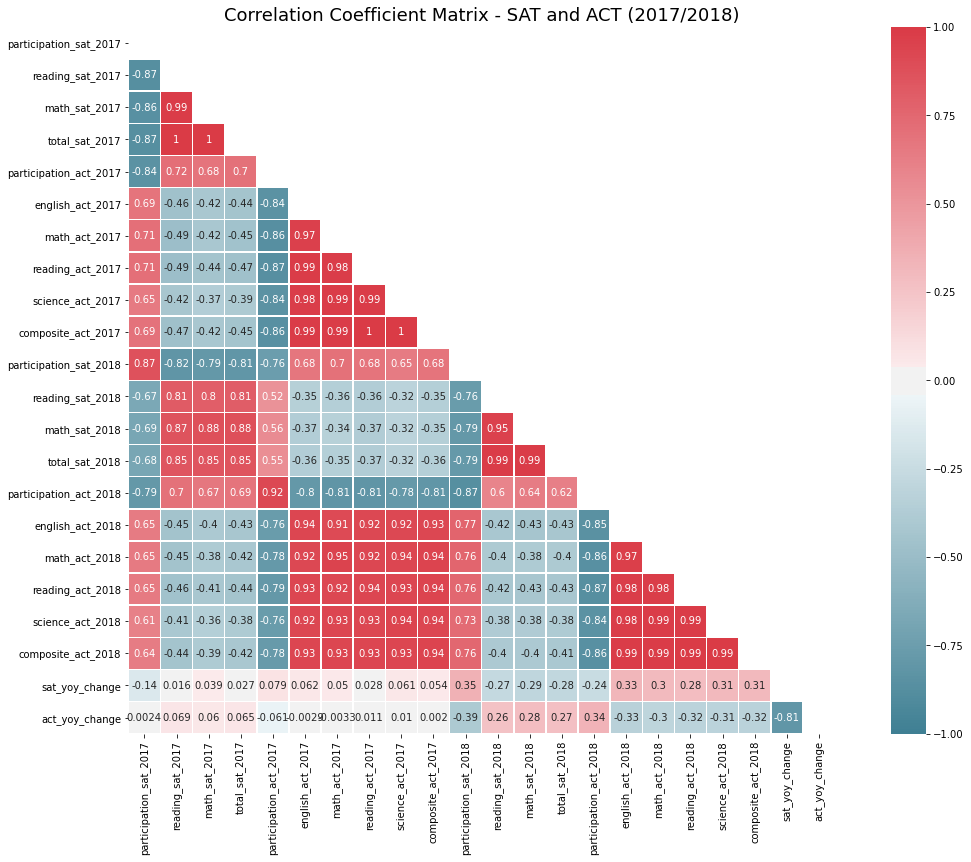

In [90]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(final.corr(), annot=True, square= True, vmin=-1 ,vmax=1, mask=mask, cmap = cmap, linewidths=0.5);
g.set_title('Correlation Coefficient Matrix - SAT and ACT (2017/2018)', fontsize=18);

**Analysis:**

**No evidence of prior year test score positively correlating to SAT participation.**

High SAT scores in 2017 does not correlate to high SAT participation rate in 2018. In fact, negative correlation is observed.

Similarly, low ACT scores in 2017 also does not correlate to high SAT 2018 participation.


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)


In [91]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    """function to plot histograms"""
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,13), sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=20, color='cornflowerblue') # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=14)
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### 1. Participation rates for SAT & ACT - Histograms

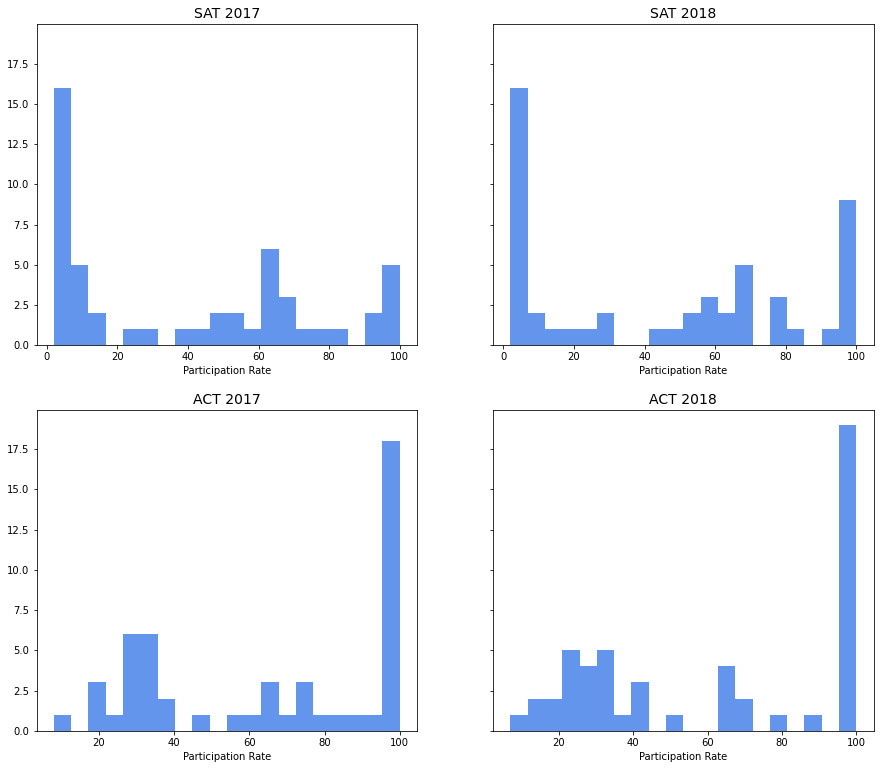

In [92]:
participation_col = ['participation_sat_2017', 'participation_sat_2018', 'participation_act_2017', 'participation_act_2018']
titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
participation_xlabel = ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate']
subplot_histograms(final, participation_col, titles, participation_xlabel)

**Analysis:**

A third of the states had 100% ACT participation in 2017 and 2018. Mirroring this, a similar proportion of states have low SAT participation rate in both years. Notably, the number of states with strong SAT participation has increased in 2018.

The shape of the histograms for SAT 2017 participation rate seems to be positively skewed, while that of SAT 2018 participation rate seems to be bimodal.

The histograms for ACT participation rate for both years are negatively skewed.

The participation rate for the two tests for both years are not normally distributed. 

#### 2. Math scores for SAT & ACT - Histograms

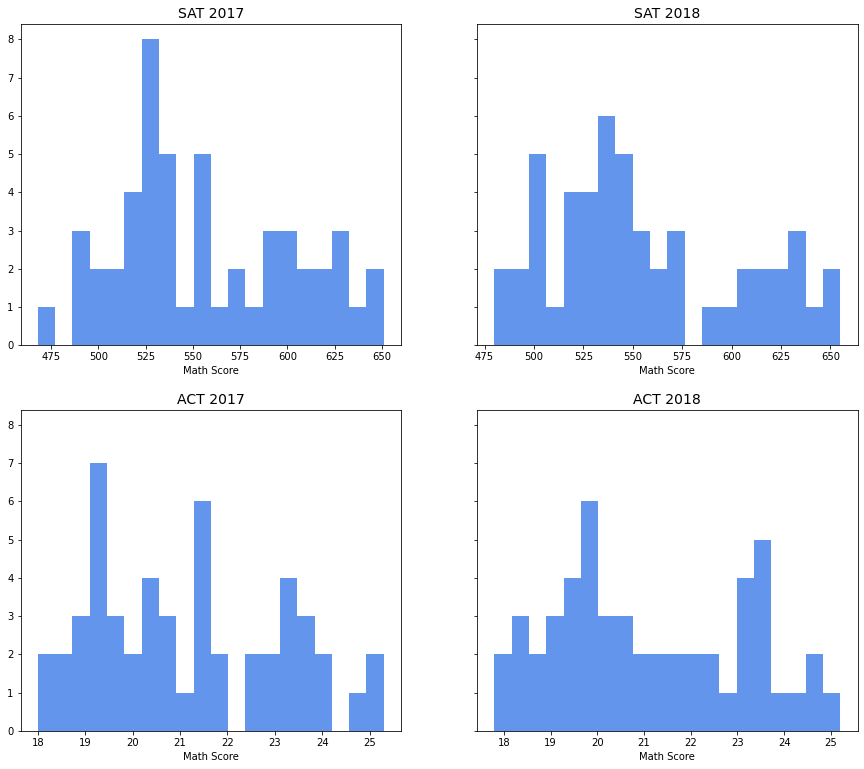

In [93]:
math_col = ['math_sat_2017', 'math_sat_2018', 'math_act_2017', 'math_act_2018']
titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
math_xlabel = ['Math Score', 'Math Score', 'Math Score', 'Math Score']
subplot_histograms(final, math_col, titles, math_xlabel)

**Analysis:**

The distribution of SAT and ACT Math scores for both years have multiple peaks, and do not follow normal distribution.

#### 3. Reading/verbal scores for SAT & ACT - Histograms

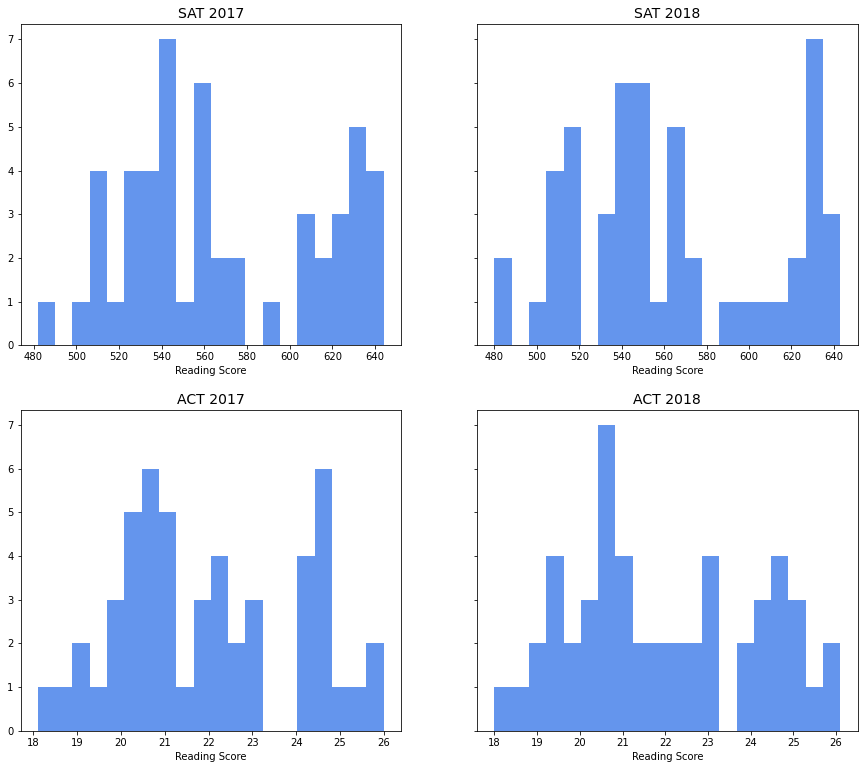

In [94]:
reading_col = ['reading_sat_2017', 'reading_sat_2018', 'reading_act_2017', 'reading_act_2018']
titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
reading_xlabel = ['Reading Score', 'Reading Score', 'Reading Score', 'Reading Score']
subplot_histograms(final, reading_col, titles, reading_xlabel)

**Analysis:**

The distribution of SAT and ACT Reading scores for both years have multiple peaks, and do not follow normal distribution.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [95]:
# defining function to plot scatter plot using seaborn

def plot_scatter_sns(dataframe, x, y, xlabel, ylabel, title, color):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.regplot(data=dataframe, x=x, y=y, color=color)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

#### 1. SAT vs. ACT math scores for 2017

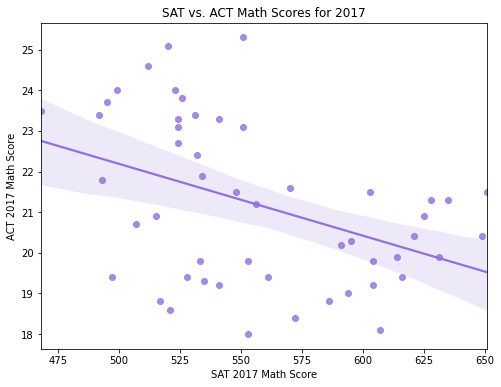

In [96]:
plot_scatter_sns(final, 'math_sat_2017', 'math_act_2017', 'SAT 2017 Math Score', 'ACT 2017 Math Score', 'SAT vs. ACT Math Scores for 2017', 'mediumpurple')

**Analysis:**

There appears to be a weak negative correlation between SAT and ACT math score for 2017. 

#### 2. SAT vs. ACT verbal/reading scores for 2017

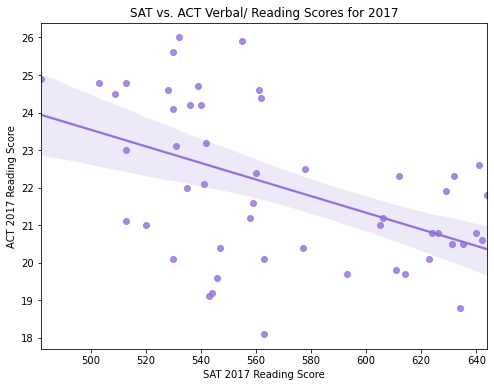

In [97]:
plot_scatter_sns(final, 'reading_sat_2017', 'reading_act_2017', 'SAT 2017 Reading Score', 'ACT 2017 Reading Score', 'SAT vs. ACT Verbal/ Reading Scores for 2017', 'mediumpurple')

**Analysis:**

Similarly, there appears to be a weak negative correlation between SAT and ACT verbal/reading score for 2017.

#### 3. SAT vs. ACT total/ composite scores for 2017

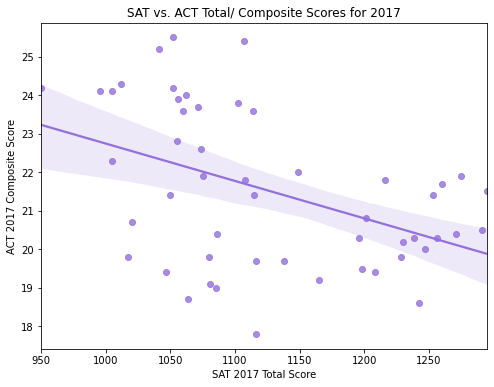

In [98]:
plot_scatter_sns(final, 'total_sat_2017', 'composite_act_2017', 'SAT 2017 Total Score', 'ACT 2017 Composite Score', 'SAT vs. ACT Total/ Composite Scores for 2017', 'mediumpurple')

**Analysis:**

There seems to be a weak negative correlation between SAT total score and ACT composite score for 2017 too.

#### 4. Total scores for SAT 2017 vs. 2018

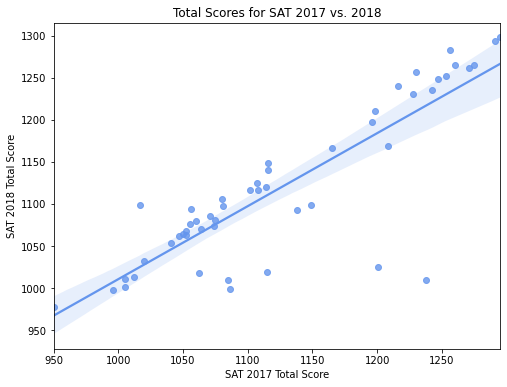

In [99]:
plot_scatter_sns(final, 'total_sat_2017', 'total_sat_2018', 'SAT 2017 Total Score', 'SAT 2018 Total Score', 'Total Scores for SAT 2017 vs. 2018', 'cornflowerblue')

**Analysis:**

The total scores for SAT 2017 vs. SAT 2018 show a strong positive correlation. States that performed well in SAT 2017 also did well in SAT 2018.

#### 5. Composite scores for ACT 2017 vs. 2018

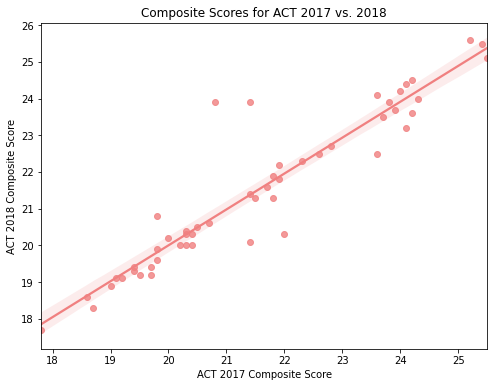

In [100]:
plot_scatter_sns(final, 'composite_act_2017', 'composite_act_2018', 'ACT 2017 Composite Score', 'ACT 2018 Composite Score', 'Composite Scores for ACT 2017 vs. 2018', 'lightcoral')

**Analysis:**

The same pattern is seen for ACT. The composite scores for ACT 2017 vs. ACT 2018 show a strong positive correlation.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

#### 1. Participation Rate of SAT and ACT in 2017 and 2018

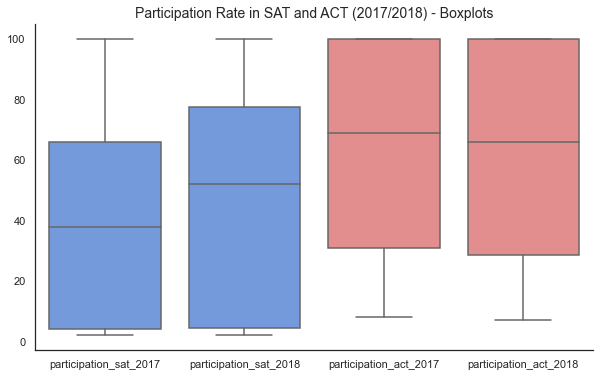

In [101]:
sns.set(style='white') 
plt.subplots(figsize=(10,6))
g = sns.boxplot(data=final[['participation_sat_2017','participation_sat_2018','participation_act_2017','participation_act_2018']],palette={'participation_sat_2017':'cornflowerblue','participation_sat_2018':'cornflowerblue','participation_act_2017':'lightcoral','participation_act_2018':'lightcoral'});
g.set_title('Participation Rate in SAT and ACT (2017/2018) - Boxplots', fontsize=14);
sns.despine()

**Analysis:**

For both years, ACT had higher median participation rate as compared to SAT.
Notably, the median participation of SAT showed improvement year-on-year.

#### 2. SAT Total Scores in 2017 and 2018

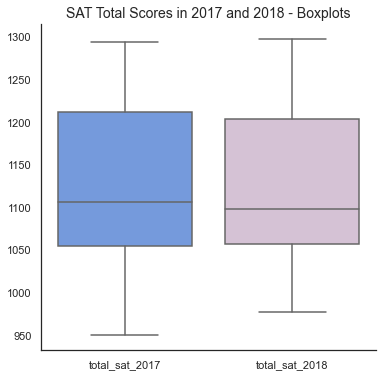

In [102]:
sns.set(style='white') 
plt.subplots(figsize=(6,6))
g = sns.boxplot(data=final[['total_sat_2017','total_sat_2018']],palette={'total_sat_2017':'cornflowerblue','total_sat_2018':'thistle'});
g.set_title('SAT Total Scores in 2017 and 2018 - Boxplots', fontsize=14);
sns.despine()

**Analysis:**

SAT 2017 and 2018 have similar median total scores and distribution.

#### 3. SAT Scores by Section in 2017 and 2018

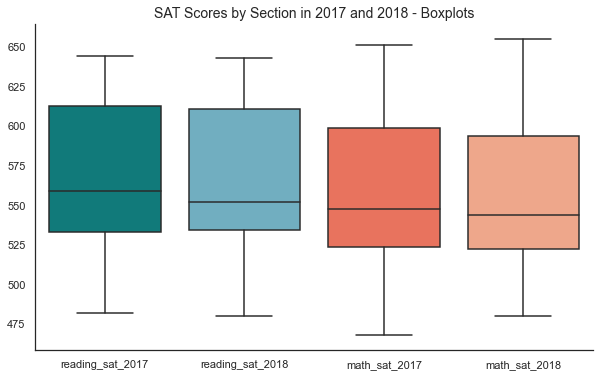

In [103]:
sns.set(style='white')
plt.subplots(figsize=(10,6))
g = sns.boxplot(data=final[['reading_sat_2017','reading_sat_2018','math_sat_2017','math_sat_2018']],palette={'reading_sat_2017':'darkcyan','reading_sat_2018':'c','math_sat_2017':'tomato','math_sat_2018':'lightsalmon'});
g.set_title('SAT Scores by Section in 2017 and 2018 - Boxplots', fontsize=14);
sns.despine()

**Analysis:**

For SAT, each section had similar median and distribution in both years.

#### 4. ACT Composite Score in 2017 and 2018

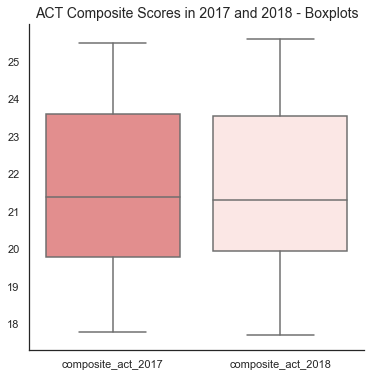

In [104]:
sns.set(style='white')
plt.subplots(figsize=(6,6))
g = sns.boxplot(data=final[['composite_act_2017','composite_act_2018']],palette={'composite_act_2017':'lightcoral','composite_act_2018':'mistyrose'});
g.set_title('ACT Composite Scores in 2017 and 2018 - Boxplots', fontsize=14);
sns.despine()

**Analysis:**

ACT 2017 and 2018 have similar median total scores and distribution.

#### 5. ACT Scores by Section in 2017 and 2018

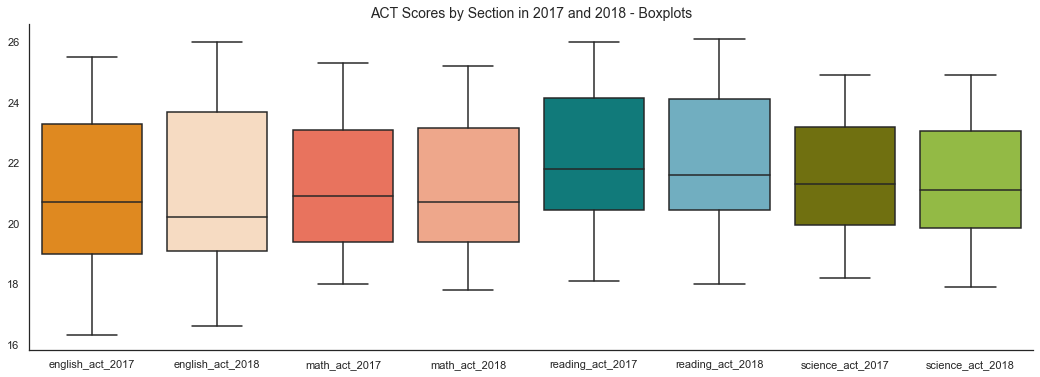

In [105]:
sns.set(style='white')
plt.subplots(figsize=(18,6))
g = sns.boxplot(data=final[['english_act_2017','english_act_2018','math_act_2017','math_act_2018', 'reading_act_2017', 'reading_act_2018', 'science_act_2017', 'science_act_2018']],palette={'english_act_2017':'darkorange','english_act_2018':'peachpuff','math_act_2017':'tomato','math_act_2018':'lightsalmon', 'reading_act_2017':'darkcyan','reading_act_2018':'c', 'science_act_2017':'olive','science_act_2018':'yellowgreen'});
g.set_title('ACT Scores by Section in 2017 and 2018 - Boxplots', fontsize=14);
sns.despine()

**Analysis:**

For ACT, with the exception of English score which showed a dip in median in 2018, other sections had similar median and distribution in both years.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Additional Analysis 1: SAT and ACT yoy change

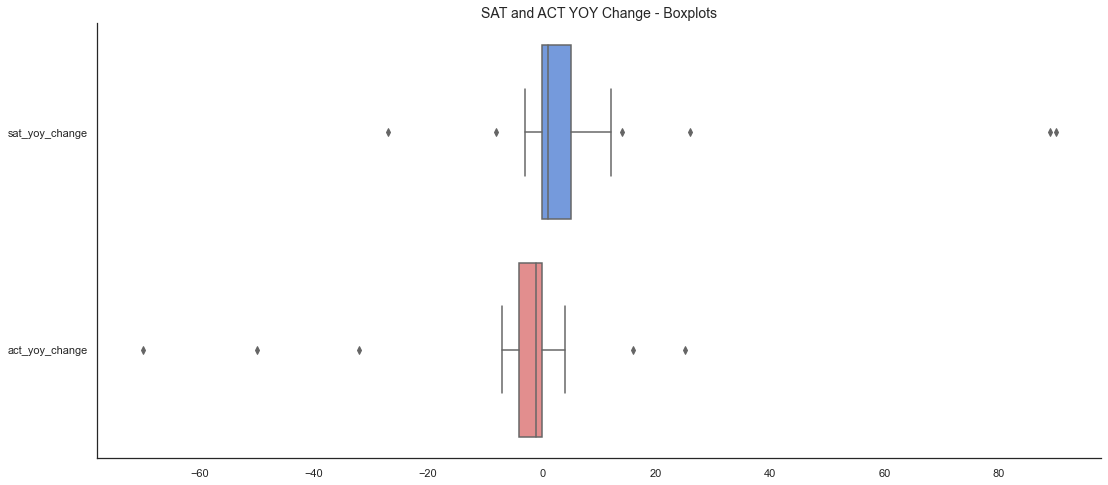

In [106]:
sns.set(style='white')
plt.subplots(figsize=(18,8))
g = sns.boxplot(data=final[['sat_yoy_change','act_yoy_change']], orient='h', palette = {'sat_yoy_change': 'cornflowerblue', 'act_yoy_change': 'lightcoral'});
g.set_title('SAT and ACT YOY Change - Boxplots', fontsize=14);
sns.despine()

#### 1a. Key states with decline in SAT participation rate yoy

In [107]:
# states with sharp decline in SAT participation yoy
final[final['sat_yoy_change']<0].sort_values('sat_yoy_change')

,state,participation_sat_2017,reading_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,sat_yoy_change,act_yoy_change
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,...,549,1099,66,19.2,19.3,21.1,19.5,19.9,-27,-7
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,...,480,977,32,23.7,22.7,24.4,23.0,23.6,-8,0
28,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,...,566,1140,100,16.6,17.8,18.0,17.9,17.7,-3,0
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,572,1149,66,18.2,19.4,19.5,19.2,19.2,-1,4


#### 1b. Key states with increase in ACT partcipation yoy

In [108]:
# states with sharp increase in ACT participation yoy
final[final['act_yoy_change']>10].sort_values('act_yoy_change', ascending=False)

,state,participation_sat_2017,reading_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,sat_yoy_change,act_yoy_change
35,Ohio,12,578,570,1149,75,21.2,21.6,22.5,22.0,...,547,1099,100,19.3,20.3,20.8,20.4,20.3,6,25
27,Nebraska,3,629,625,1253,84,20.9,20.9,21.9,21.5,...,623,1252,100,19.4,19.8,20.4,20.1,20.1,0,16


#### 1c. Key states with increase in SAT participation yoy

In [109]:
# states with sharp increase in SAT participation yoy
final[final['sat_yoy_change']>20].sort_values('sat_yoy_change', ascending=False)

,state,participation_sat_2017,reading_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,sat_yoy_change,act_yoy_change
13,Illinois,9,559,556,1115,93,21.0,21.2,21.6,21.3,...,506,1019,43,24.1,23.4,24.2,23.4,23.9,90,-50
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,...,506,1025,30,23.9,23.2,24.4,23.5,23.9,89,-70
39,Rhode Island,71,539,524,1062,21,24.0,23.3,24.7,23.4,...,505,1018,15,24.4,23.6,25.0,23.5,24.2,26,-6


#### 1d. Key States with decline in ACT participation yoy

In [110]:
# states with sharp drop in ACT participation yoy
final[final['act_yoy_change']<-20].sort_values('act_yoy_change')

,state,participation_sat_2017,reading_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,sat_yoy_change,act_yoy_change
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,...,506,1025,30,23.9,23.2,24.4,23.5,23.9,89,-70
13,Illinois,9,559,556,1115,93,21.0,21.2,21.6,21.3,...,506,1019,43,24.1,23.4,24.2,23.4,23.9,90,-50
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,544,1106,33,19.8,20.6,21.6,20.7,20.8,5,-32


**Analysis:**

Sharp increase in SAT participation rate seen for **Colorado** and **Illinois**, along with decline in ACT participation, indicates conversion from ACT to SAT. 

**Rhode Island** also saw a notable increase in SAT participation.

Understanding the driver behind this uptake in SAT participation may present opportunity to map the same strategy to other states to boost SAT participation rate.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics
------

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [111]:
final.agg([np.mean, np.median]).T

,mean,median
participation_sat_2017,39.803922,38.0
reading_sat_2017,569.117647,559.0
math_sat_2017,556.882353,548.0
total_sat_2017,1126.098039,1107.0
participation_act_2017,65.254902,69.0
english_act_2017,20.931373,20.7
math_act_2017,21.182353,20.9
reading_act_2017,22.013725,21.8
science_act_2017,21.450980,21.3
composite_act_2017,21.519608,21.4


In [112]:
final.skew()

participation_sat_2017    0.346450
reading_sat_2017          0.272693
math_sat_2017             0.365040
total_sat_2017            0.310903
participation_act_2017   -0.197989
english_act_2017          0.352660
math_act_2017             0.332683
reading_act_2017          0.269366
science_act_2017          0.218823
composite_act_2017        0.319810
participation_sat_2018    0.136228
reading_sat_2018          0.282300
math_sat_2018             0.530407
total_sat_2018            0.466432
participation_act_2018   -0.021916
english_act_2018          0.371507
math_act_2018             0.269548
reading_act_2018          0.201361
science_act_2018          0.172383
composite_act_2018        0.281962
sat_yoy_change            3.864080
act_yoy_change           -3.274447
dtype: float64

**Answer:**

Across variables, the mean and median are slightly different, and are either positively or negatively skewed, indicating that the distributions do not follow normal distribution. 


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

**Answer:**

No, normal distribution is not observed in our analysis.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**

For **Math** and **Reading** mean scores, normal distribution is not observed. The sampling distribution of Math and Reading scores for the two test in both years are positively skewed.

In this analysis, the 51 samples are taken by state, and are not randomly sampled across the nation, so this does not satisfy the condition of CLT. 

Since CLT does not hold, we cannot apply statistical inferences using these data.

As for **Participation Rate**, we have actual percentage by each of the 51 states (rather than a mean score). When we examine the rate for the 51 states, we are not actually looking at a sampling distribution. Hence, CLT is not applicable in the context of Participation Rate.

Examining the distribution of participation rate itself, it is noted that it is positively skewed for SAT and negatively skewed for ACT.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**

No, statistical inference should not be conducted for SAT and ACT participation rate as the distribution is not normal.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answer:**

As the assumption for CLT does not hold for SAT and ACT Math score, and that the students participating in SAT may or may not also take ACT, we cannot make statistical inference to say that students with higher SAT math score is better than those with lower ACT math score unless we have access to data of test score at individual candidate level.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research
------

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Analysis:**

Based on the analysis conducted, sharp increase in SAT participation rate is seen year-on-year in 2018 for **Colorado** and **Illinois**, along with decline in ACT participation, indicates conversion from ACT to SAT. 

**Rhode Island** also saw a notable increase in SAT participation year-on-year.

Understanding the driver behind this uptake in SAT participation may present opportunity to map the same strategy to other states to boost SAT participation rate. 

Further secondary research shows that **state contracts and state funded test** are key driver of SAT participation rate in Colorado, Illinois and Rhode Island in 2018.

According to report from *Education Week*, in 2017-2018, 10 states (**Colorado**, Connecticut, Delaware, Idaho, **Illinois**, Maine, Michigan, New Hampshire, **Rhode Island**, and West Virginia) and the District of Columbia **covered the cost of the SAT for all their public school students**. Three years prior to that, only three states and the District of Columbia did so. 

*Chicago Tribune* also reported the College Board winning state contract in Illinois, and the state will offer state-funded SAT test to high school juniors. 

*Chalkbeat Colorado* also reported taht Colorado high school juniors will be required to take the SAT college-entrance exam instead of the ACT. 

Source:

1. https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html
2. https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html
3. https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers
4. https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html)

## Conclusions and Recommendations
------

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Recommendations:

**State contracts and state funded test are key drivers to SAT participation**. 

It is recommended that the College Board focuses on **developing partnership with states that do not have any prevailing contract awarded to either the College Board or ACT, and currently have low SAT participation in 2018**. Examples of such states include **Iowa, Kansas, and South Dakota**. Priority can be placed on Iowa, which has a higher population.

On a longer term, the College Board may consider looking at **states that already mandate state-wide ACT participation and lobby the education boards to switch to the SAT when the existing state contract is about to end**. These states are more likely to have the required infrastructure and resources to support state-wide test arrangement. Examples of such states include Montana, Utah and Wyoming.

### Data Limitations:

Statistical inferences for national population based cannot be made based on the 51 state samples as the samples are not randomly drawn.

Given data availability for the year 2017 and 2018 only, and not for subsequent or preceding years, this trend analysis is limited to these 2 years rather than offering a longitudinal view.

With the aggregation of data by state, there are only 51 data points per dataset to work with, and more granular analyses on a county or school level cannot be performed.

Hence, the conclusions and recommendations made are subjected to these data limitations.